In [139]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
plt.style.use("cyberpunk")

import os

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [140]:
os.chdir('C:/Users/jean_/dev/github/ML/Documents/')
diretorio_atual = os.getcwd()

df = pd.DataFrame(pd.read_csv("train_linear_regression.csv", sep = ",", decimal = "."))

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [142]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [143]:
df = df.dropna()

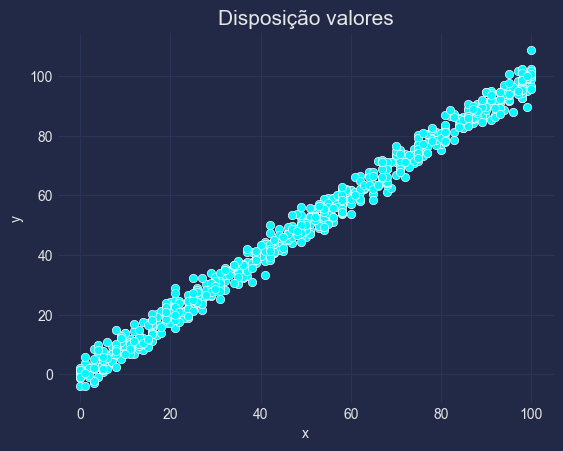

In [144]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data = df, x = df['x'], y = df['y'])
plt.title('Disposição valores', fontsize = 15)

plt.show()

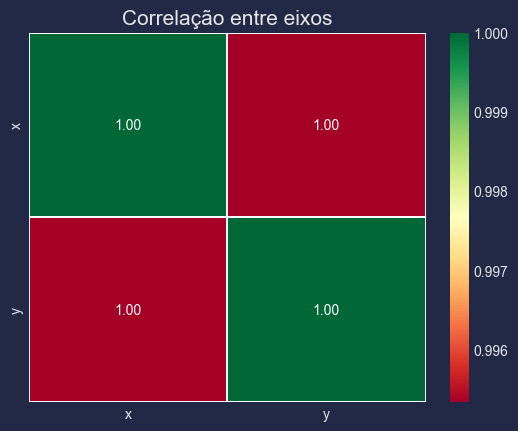

In [145]:
fig, ax = plt.subplots()

ax = sns.heatmap(data = df.corr(), annot = True, linewidths = .3, cmap = "RdYlGn", fmt = '.2f')
plt.title('Correlação entre eixos', fontsize = 15)

plt.show()

In [146]:
x_atual = df.loc[:, 'x'].values
y_atual = df.loc[:, 'y'].values

In [147]:
np.corrcoef(df.loc[:, 'x'].values, df.loc[:, 'y'].values)

array([[1.        , 0.99533991],
       [0.99533991, 1.        ]])

In [148]:
lin_reg = LinearRegression()
lr_model = lin_reg.fit(x_atual.reshape(-1, 1), y_atual)

In [149]:
y_previsto = lr_model.predict(x_atual.reshape(-1, 1))

In [150]:
score = lr_model.score(x_atual.reshape(-1, 1), y_previsto)
coeficiente_angular = lr_model.coef_
intercepto = lr_model.intercept_
mae = mean_absolute_error(y_previsto, y_atual)

print(f'O valor do score do modelo criado é {score}')
print(f'O coeficiente angular do modelo criado é {coeficiente_angular}')
print(f'O intercepto do modelo criado é {intercepto}')
print(f'O valor do MAE do modelo criado é {mae}')

O valor do score do modelo criado é 1.0
O coeficiente angular do modelo criado é [1.00065638]
O intercepto do modelo criado é -0.10726546430095141
O valor do MAE do modelo criado é 2.227151953645558


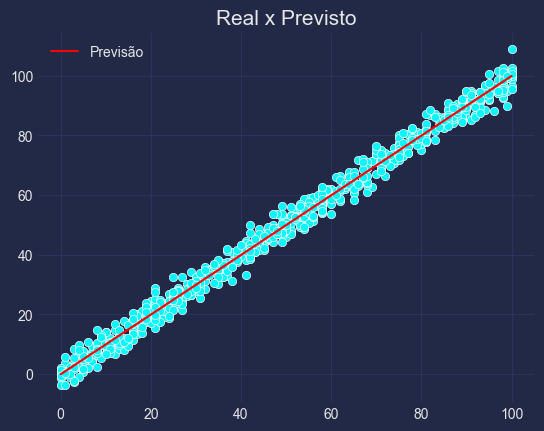

In [161]:
fig, ax = plt.subplots()
ax1 = sns.scatterplot(x = x_atual, y = y_atual)
ax2 = sns.lineplot(x = x_atual, y = y_previsto, color = 'red', label = 'Previsão')
plt.title('Real x Previsto', fontsize = 15)
plt.legend()
plt.show()